52100924-Nguyễn Văn Anh Quân
52100922-Lê Phạm Hoàng Phương

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#Dự đoán xác suất khách hàng đăng ký gửi tiền gửi trái phiếu hay không.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Số dòng: 41188
Số cột: 21
Thông tin cơ bản về dữ liệu:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

 

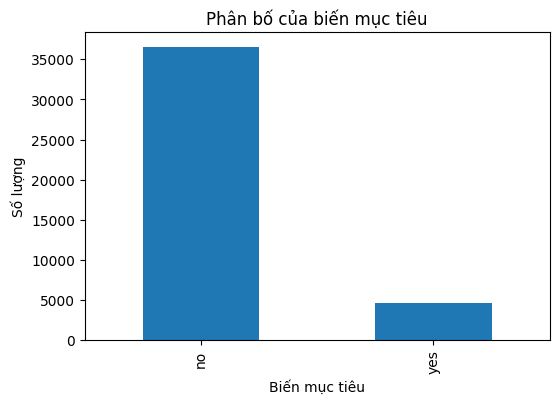


Các đặc trưng:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Độ quan trọng của các đặc trưng:
age : 0.07913392423528388
duration : 0.28224704996639777
campaign : 0.039797405906997284
pdays : 0.02770901189549111
previous : 0.010652136287581448
emp.var.rate : 0.022468743120177725
cons.price.idx : 0.02155698876581734
cons.conf.idx : 0.024970241459919017
euribor3m : 0.09526655151527608
nr.employed : 0.04930890979221507
job_housemaid : 0.012042660249778741
job_services : 0.008223750158955429
job_admin. : 0.0038111344996211096
job_blue-collar : 0.003000634046815567
job_technician : 0.006544921472944746
job_retired : 0.00551778917451577
job_management : 0.004233165064907421
job_unemployed : 0.006300871060317925
job_self-employed : 0.004085970746503749
job_unknown : 0.009692901900425219
job_entrepreneur : 0.0035277609588758125
job_student : 0.001631778426970019
marital_married : 0.006964837539722995
marital_single : 0.011640281346776887
marital_divorced : 0.010668672662091672
marital_unknown : 0.00056827904554752
education_basic.4y : 0.0059678921175714

In [13]:
#1)Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Xem thông tin cơ bản về dữ liệu
#Thông tin cơ bản về dữ liệu và thống kê mô tả của dữ liệu được in ra.
num_rows = data.shape[0]
num_cols = data.shape[1]

# In thông tin
print("Số dòng:", num_rows)
print("Số cột:", num_cols)
print("Thông tin cơ bản về dữ liệu:")
print(data.head())
print("\nThông tin thống kê mô tả của dữ liệu:")
print(data.describe())

# Phân tích biến mục tiêu
target_counts = data['y'].value_counts()
print("\nSố lượng và phân bố của biến mục tiêu:")
print(target_counts)
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.xlabel('Biến mục tiêu')
plt.ylabel('Số lượng')
plt.title('Phân bố của biến mục tiêu')
plt.show()

# Xem các đặc trưng
features = data.drop('y', axis=1)
print("\nCác đặc trưng:")
print(features.head())

# Mã hóa one-hot để biểu diễn các đặc trưng chuỗi dưới dạng các vector nhị phân
categorical_features = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = encoder.fit_transform(features[categorical_features])

# Tạo danh sách tên đặc trưng đã mã hóa
encoded_feature_names = []
for i, column in enumerate(categorical_features):
    unique_values = features[column].unique()
    for value in unique_values:
        encoded_feature_names.append(f'{column}_{value}')

# Tạo DataFrame từ các đặc trưng đã mã hóa để có được một bảng dữ liệu mới, trong đó mỗi cột tương ứng với một giá trị đặc trưng đã được mã hóa.
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Kết hợp các đặc trưng đã mã hóa với các đặc trưng số
features_encoded = pd.concat([features.drop(categorical_features, axis=1), encoded_df], axis=1)

# Chia dữ liệu thành đặc trưng và biến mục tiêu
X = features_encoded
y = data['y']

# Xây dựng mô hình RandomForestClassifier
model = RandomForestClassifier()

# Đào tạo mô hình trên dữ liệu
model.fit(X, y)

# Đánh giá độ quan trọng của các đặc trưng, nó thể hiện mức độ ảnh hưởng của chúng đến kết quả dự đoán của mô hình.
feature_importances = model.feature_importances_
print("\nĐộ quan trọng của các đặc trưng:")
for feature, importance in zip(X.columns, feature_importances):
    print(feature, ':', importance)

In [3]:
#2)Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi các biến hạng mục thành dạng số
features = pd.get_dummies(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Sử dụng mô hình Naive Bayes Classifier không thuộc Ensemble Learing
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Naive Bayes Classifier: {:.2f}".format(accuracy))

#Sử dụng K-Nearest Neighbors không thuộc Ensemble Learing
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Độ chính xác của mô hình K-Nearest Neighbors: {:.2f}".format(knn_accuracy))

#Sử dụng Random Forest thuộc Ensemble Learing
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Độ chính xác của mô hình Random Forest: {:.2f}".format(rf_accuracy))

# Sử dụng Gradient Boosting thuộc Ensemble Learing
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Độ chính xác của mô hình Gradient Boosting: {:.2f}".format(gb_accuracy))

Độ chính xác của mô hình Naive Bayes Classifier: 0.83
Độ chính xác của mô hình K-Nearest Neighbors: 0.89
Độ chính xác của mô hình Random Forest: 0.89
Độ chính xác của mô hình Gradient Boosting: 0.91


In [4]:
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi các biến hạng mục thành dạng số
features = pd.get_dummies(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Sử dụng mô hình Naive Bayes với kiểm soát tham số làm mịn
nb_model = GaussianNB(var_smoothing=1e-9)

# Sử dụng mô hình Naive Bayes Classifier không thuộc Ensemble Learing
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Naive Bayes Classifier: {:.2f}".format(accuracy))

# Sử dụng K-Nearest Neighbors với kiểm soát tham số k
knn_model = KNeighborsClassifier(n_neighbors=5)
# Tạo pipeline với StandardScaler và K-Nearest Neighbors
knn_model_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

#Sử dụng K-Nearest Neighbors không thuộc Ensemble Learing
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model_pipe.fit(X_train, y_train)
knn_y_pred = knn_model_pipe.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Độ chính xác của mô hình K-Nearest Neighbors: {:.2f}".format(knn_accuracy))

# Áp dụng kiểm soát độ sâu của cây cho Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

#Sử dụng Random Forest thuộc Ensemble Learing
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Độ chính xác của mô hình Random Forest: {:.2f}".format(rf_accuracy))

# Áp dụng kiểm soát kích thước của mô hình cho Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)

# Sử dụng Gradient Boosting thuộc Ensemble Learing
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Độ chính xác của mô hình Gradient Boosting: {:.2f}".format(gb_accuracy))

Độ chính xác của mô hình Naive Bayes Classifier: 0.86
Độ chính xác của mô hình K-Nearest Neighbors: 0.90
Độ chính xác của mô hình Random Forest: 0.91
Độ chính xác của mô hình Gradient Boosting: 0.92


In [5]:
#3)Sử dụng Feed Forward Neural Network để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình Feed Forward Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Feed Forward Neural Network: {:.2f}".format(accuracy))


Epoch 1/10
103/103 [==============================] - 2s 3ms/step - loss: 0.3155 - accuracy: 0.8847
Epoch 2/10
103/103 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9117
Epoch 3/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9171
Epoch 4/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9263
Epoch 5/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9341
Epoch 6/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9387
Epoch 7/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9426
Epoch 8/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9454
Epoch 9/10
103/103 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9493
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Độ chính xác của mô hình Feed Forwa

In [6]:
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình Feed Forward Neural Network của câu (3) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình Feed Forward Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Thêm lớp dropout để tránh overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Huấn luyện mô hình
#Dùng early stopping để dừng quá trình huấn luyện khi độ chính xác trên tập kiểm tra ngừng cải thiện, giúp tránh overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)   # Dừng sau 3 epochs không có cải thiện
# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Feed Forward Neural Network: {:.2f}".format(accuracy))

Epoch 1/20
1030/1030 [==============================] - 4s 3ms/step - loss: 0.2479 - accuracy: 0.8962 - val_loss: 0.1974 - val_accuracy: 0.9090
Epoch 2/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2046 - accuracy: 0.9046 - val_loss: 0.1902 - val_accuracy: 0.9098
Epoch 3/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1962 - accuracy: 0.9062 - val_loss: 0.1890 - val_accuracy: 0.9110
Epoch 4/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1935 - accuracy: 0.9066 - val_loss: 0.1876 - val_accuracy: 0.9104
Epoch 5/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1897 - accuracy: 0.9086 - val_loss: 0.1868 - val_accuracy: 0.9118
Epoch 6/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1885 - accuracy: 0.9079 - val_loss: 0.1864 - val_accuracy: 0.9116
Epoch 7/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1857 - accuracy: 0.9109 - val_loss: 0.1855 - val_accuracy:

In [7]:
#3)Sử dụng Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu cho LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
# Loại bỏ lớp Dropout để tránh overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Huấn luyện mô hình
# Loại bỏ early stopping để giảm giới hạn quá trình huấn luyện
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Đánh giá mô hình
y_pred = model.predict(X_test_reshaped)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Long Short-Term Memory: {:.2f}".format(accuracy))

Epoch 1/10
103/103 [==============================] - 3s 10ms/step - loss: 0.4151 - accuracy: 0.8574 - val_loss: 0.2585 - val_accuracy: 0.9005
Epoch 2/10
103/103 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9044 - val_loss: 0.2184 - val_accuracy: 0.9041
Epoch 3/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1847 - accuracy: 0.9165 - val_loss: 0.2068 - val_accuracy: 0.8968
Epoch 4/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1633 - accuracy: 0.9290 - val_loss: 0.2039 - val_accuracy: 0.9041
Epoch 5/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1518 - accuracy: 0.9360 - val_loss: 0.2116 - val_accuracy: 0.9078
Epoch 6/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9399 - val_loss: 0.2124 - val_accuracy: 0.9053
Epoch 7/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9387 - val_loss: 0.2176 - val_accuracy: 0.9114
Epoch

In [8]:
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình Reccurent Neural Network (hoặc mô thuộc loại này) của câu (3) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu cho LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dropout(0.5)) # Thêm lớp dropout để tránh overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Huấn luyện mô hình
#Dùng early stopping để dừng quá trình huấn luyện khi độ chính xác trên tập kiểm tra ngừng cải thiện, giúp tránh overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Dừng sau 3 epochs không có cải thiện
# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
y_pred = model.predict(X_test_reshaped)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Long Short-Term Memory: {:.2f}".format(accuracy))

Epoch 1/20
1030/1030 [==============================] - 8s 6ms/step - loss: 0.2395 - accuracy: 0.8992 - val_loss: 0.1912 - val_accuracy: 0.9105
Epoch 2/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1939 - accuracy: 0.9083 - val_loss: 0.1888 - val_accuracy: 0.9110
Epoch 3/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1894 - accuracy: 0.9097 - val_loss: 0.1894 - val_accuracy: 0.9119
Epoch 4/20
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1866 - accuracy: 0.9118 - val_loss: 0.1858 - val_accuracy: 0.9132
Epoch 5/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1843 - accuracy: 0.9109 - val_loss: 0.1847 - val_accuracy: 0.9130
Epoch 6/20
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1823 - accuracy: 0.9129 - val_loss: 0.1841 - val_accuracy: 0.9128
Epoch 7/20
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1813 - accuracy: 0.9128 - val_loss: 0.1853 - val_accuracy:

5. Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.

Để cải thiện độ chính xác của mô hình và giải quyết các trường hợp sai, bạn có thể thực hiện các bước sau:

  - Phân tích các trường hợp sai: Xem xét các dự đoán sai của mô hình và phân tích các trường hợp đó để hiểu nguyên nhân gây ra sai lầm. Điều này có thể bao gồm xem xét các đặc trưng quan trọng, kiểm tra các giả định của mô hình, hoặc xem xét các trường hợp đặc biệt mà mô hình không thể dự đoán chính xác.

- Đề ra giải pháp: Dựa trên phân tích các trường hợp sai, bạn có thể đề xuất các giải pháp để cải thiện độ chính xác của mô hình. Ví dụ:

- Tăng cường dữ liệu: Nếu dữ liệu hiện có không đủ và không đại diện đầy đủ cho các trường hợp khác nhau, bạn có thể tăng cường dữ liệu bằng cách thu thập thêm dữ liệu hoặc sử dụng kỹ thuật tăng cường dữ liệu (data augmentation).

- Xử lý các đặc trưng quan trọng: Nếu có các đặc trưng quan trọng mà mô hình không xử lý tốt, bạn có thể xem xét cách xử lý hoặc biến đổi lại các đặc trưng đó để cung cấp thông tin hữu ích hơn cho mô hình.

- Tinh chỉnh tham số: Các mô hình học máy có thể có các tham số điều chỉnh. Bạn có thể thử nghiệm và tinh chỉnh các tham số này để xem xem liệu có thể cải thiện độ chính xác của mô hình hay không.

- Sử dụng mô hình khác: Nếu mô hình hiện tại không đạt được độ chính xác mong muốn, bạn có thể thử nghiệm với các mô hình khác hoặc kỹ thuật khác để xem xem liệu chúng có hoạt động tốt hơn cho bài toán của bạn hay không.

- Thực hiện giải pháp: Áp dụng các giải pháp mà bạn đã đề xuất và thực hiện lại quá trình huấn luyện mô hình với các thay đổi. Điều này có thể bao gồm việc thay đổi cấu hình mô hình, tiền xử lý dữ liệu khác, hoặc sử dụng các kỹ thuật mới.

- Đánh giá cải tiến: Sau khi thực hiện các giải pháp, đánh giá mô hình để xem liệu độ chính xác đã được cải thiện so với trước không. So sánh kết quả với các mô hình trước đó hoặc các chỉ số đánh giá khác như độ chính xác, độ phủ, F1-score, hay AUC-ROC để đánh giá hiệu suất của mô hình.